In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
def get_data(name='AAPL',start='2020-01-01', end='2021-06-12'):
    aapl= yf.Ticker("aapl")
    df = yf.download('AAPL', 
                        start=start, 
                        end=end, 
                        progress=False,
    )
    df['Date'] = pd.to_datetime(df.index,format='%Y-%m-%d')
    df.index = df['Date']
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close','Open'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]
        new_data['Open'][i] = data['Open'][i]
    
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)
    dataset = new_data.values
    n=int(0.9*len(dataset))
    train = dataset[0:n,:]
    valid = dataset[n:,:]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    x_train_open, y_train_open,x_train_close, y_train_close = [], [],[],[]
    for i in range(60,len(train)):
        x_train_open.append(scaled_data[i-60:i,1])
        y_train_open.append(scaled_data[i,1])
        x_train_close.append(scaled_data[i-60:i,0])
        y_train_close.append(scaled_data[i,0])
    x_train_open, y_train_open,x_train_close, y_train_close = np.array(x_train_open),\
        np.array(y_train_open),np.array(x_train_close),np.array(y_train_close)

    x_train_open = np.reshape(x_train_open, (x_train_open.shape[0],x_train_open.shape[1],1))
    x_train_close = np.reshape(x_train_close, (x_train_close.shape[0],x_train_close.shape[1],1))
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs  = scaler.transform(inputs)
    X_test_open,X_test_close = [],[]
    for i in range(60,inputs.shape[0]):
        X_test_close.append(inputs[i-60:i,0])
        X_test_open.append(inputs[i-60:i,1])
    X_test_open,X_test_close = np.array(X_test_open),np.array(X_test_close)

    X_test_open = np.reshape(X_test_open, (X_test_open.shape[0],X_test_open.shape[1],1))
    X_test_close = np.reshape(X_test_close, (X_test_close.shape[0],X_test_close.shape[1],1))  
    
    return n,new_data,scaler,x_train_open,x_train_close,y_train_open,y_train_close,X_test_open,X_test_close
        
    
    
    

In [3]:
#from models import LSTM

n,new_data,scaler,x_train_open,x_train_close,y_train_open,y_train_close,X_test_open,X_test_close=get_data(name='AAPL',start='2020-01-01', 
                    end='2021-06-12')
model=lstm((x_train_close.shape[1],1))
model.fit(x_train_close, y_train_close, epochs=5, batch_size=2, verbose=1)
clo_price = model.predict(X_test_close)


model=lstm((x_train_open.shape[1],1))
model.fit(x_train_open, y_train_open, epochs=5, batch_size=2, verbose=1)
open_price=model.predict(X_test_open)
closing_price=scaler.inverse_transform(np.stack((open_price[:,0],clo_price[:,0]),axis=1))[:,0]
opening_price=scaler.inverse_transform(np.stack((open_price[:,0],clo_price[:,0]),axis=1))[:,1]



NameError: name 'lstm' is not defined

In [ ]:
from visualize_data import plot_trend
plot_trend(n,new_data,opening_price,key="Open")


/home/nitishs/Assignments/AML/visualize_data.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


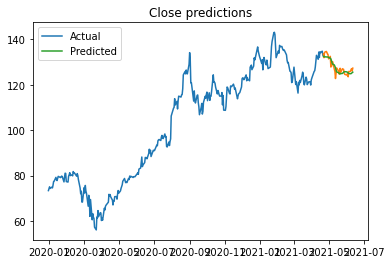

In [5]:
from visualize_data import plot_trend
plot_trend(n,new_data,opening_price,key="Close")

In [45]:
y_pred=((closing_price-opening_price)>0).astype(int)
y_true=((new_data[n:]['Close']-new_data[n:]['Open'])>0).astype(int)

In [46]:
print(closing_price-opening_price)
print((new_data[n:]['Close']-new_data[n:]['Open']))

[4.9275665 4.8604736 5.1290436 4.7511597 4.6871643 4.8681793 5.169037
 5.8876343 6.1665344 6.016327  6.5837326 6.7734528 6.2010117 5.9218216
 6.2363358 5.7661743 5.7253876 5.5236588 5.123291  5.1117325 5.480751
 5.314514  4.806404  5.145088  5.019409  5.1599274 5.2065735 5.4415207
 5.6441345 5.7545624 5.483963  5.514786  5.0205917 4.848694  4.732048
 4.7207336 4.947708 ]
Date
2021-04-21    1.139999
2021-04-22   -1.099991
2021-04-23    2.160004
2021-04-26   -0.110001
2021-04-27   -0.619995
2021-04-28   -0.729996
2021-04-29   -2.990005
2021-04-30   -0.319992
2021-05-03         0.5
2021-05-04   -3.340004
2021-05-05   -1.099991
2021-05-06    1.850006
2021-05-07   -0.639999
2021-05-10   -2.560005
2021-05-11    2.410004
2021-05-12   -0.630005
2021-05-13    0.389999
2021-05-14    1.199997
2021-05-17   -0.550003
2021-05-18   -1.709999
2021-05-19    1.529999
2021-05-20    2.079994
2021-05-21   -2.389999
2021-05-24    1.089996
2021-05-25   -0.919998
2021-05-26   -0.110001
2021-05-27   -1.160004


In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true,y_pred)

array([[ 0, 23],
       [ 0, 14]])

<AxesSubplot:>

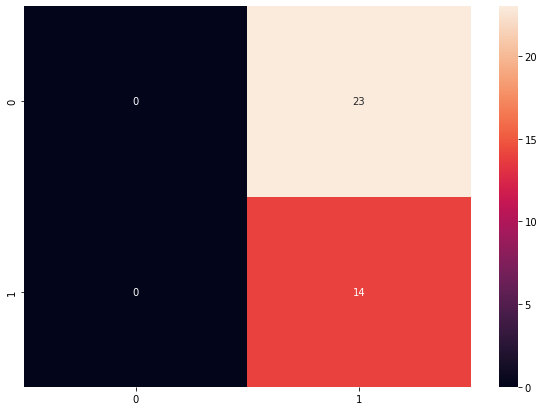

In [49]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred=((closing_price-opening_price)>0).astype(int)
y_true=((new_data[n:]['Close']-new_data[n:]['Open'])>0).astype(int)
mat=confusion_matrix(y_true,y_pred)
df_cm = pd.DataFrame(mat, index = [i for i in "01"],
              columns = [i for i in "01"])
plt.figure(figsize = (10,7))

sn.heatmap(df_cm, annot=True)

    



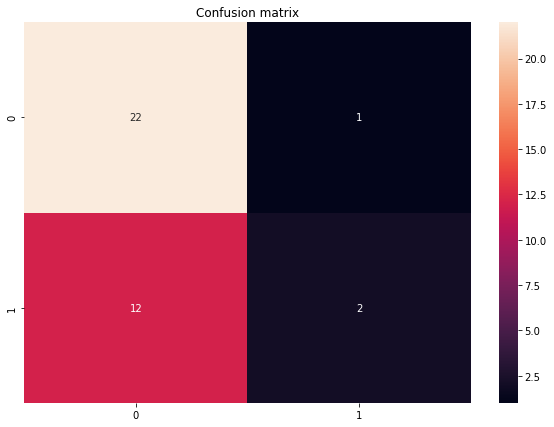

In [7]:
from score_metrics import plot_confusion

plot_confusion(n,new_data,opening_price,closing_price)